## Data Cleaning and Feature Analysis


In [34]:
import pymysql
from cryptography.fernet import Fernet
import json
from collections import namedtuple
import time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine 
from sklearn.preprocessing import scale

%matplotlib inline

<b> Increase the size of the screen to view more features </b>

In [3]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<b> Decrypt the credentials </b>

In [4]:
#Uncode the secret license file
def unencrypt():
    try:
        key = b'IXx5rHfP15FqP4ahx2pwcud-XmcBzU553Ri6p-nVhnc=' #Fernet.generate_key()
        cipher_suite = Fernet(key)
        with open('/usr/local/etc/musicmood_bytes.bin', 'rb') as file_object:
            for line in file_object:
                encryptedpwd = line
        uncipher_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encryptedpassword = bytes(uncipher_text).decode("utf-8") #convert to string
        x = json.loads(plain_text_encryptedpassword, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
        return x
    except Exception as e:
        print(str(e))
        return "Error" 

<b> Connect to the Database </b>

In [5]:
#Setup the database connection
credentials = unencrypt()
user_id = credentials.user
user_password = credentials.password
dbname = credentials.dbname
server = credentials.server
conn = pymysql.connect(server,user_id,user_password,dbname)

<b> Obtain the data from the Database </b>

In [26]:
start_time = time.time()
df = pd.read_sql('SELECT * FROM songs_instance', con = conn)
print("--- %s seconds ---" % (time.time() - start_time))
df.head(15)

--- 1.6094200611114502 seconds ---


,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,genre,Blues,ChildrensMusic,Christian_Gospel,Christmas,Comedy,Country_,Folk,House_Electronic_Trance,Jazz,Last_Position,Latin,Metal,Pop_Standards,Pop,Punk,R_And_B,Rap_Hip_Hop,Rock_And_Roll,Rock,Ska_Reggae_Dancehall,Soul,Soundtrack,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0.624,0.788,0,-8.207,1,0.730,274.355,120.658,3,1.000,3638.1,2970.3,9.60,99.58,12.76,Rock,0,0,0,0,0,0,1,0,0,93,0,0,0,0,0,0,0,0,1,0,0,0,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,100.0,290.0,0.34,80,229,0.35,1.5270
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,0.213,0.435,4,-5.906,0,0.399,222.586,119.888,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Pop,0,0,0,0,0,0,0,0,0,94,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,92.0,339.0,0.27,86,285,0.30,1.6483
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,0.398,0.427,9,-6.061,0,0.298,360.240,115.613,4,0.868,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,88,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,70.0,220.0,0.32,86,285,0.30,1.6483
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,0.000,0.930,1,-8.687,1,0.791,276.962,112.747,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Soul,0,0,0,0,0,0,0,0,0,93,0,0,0,0,0,0,0,0,0,0,1,0,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,97.0,283.0,0.34,83,265,0.31,1.4474
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,0.311,0.364,10,-13.811,0,0.362,381.515,131.183,4,0.000,2862.5,2317.5,7.18,82.38,20.70,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,132.0,524.0,0.25,83,265,0.31,1.4474
5,TRMDYGQ128F14963D6,1472,Part-Time Lover,Stevie Wonder,21,1,93,1,8,10,12,14,16,30,1985-09-07,1985,1986-01-25,1986,1980,253,0.305,0.631,3,-12.894,0,0.629,247.130,87.268,4,0.709,4346.7,3516.3,7.19,107.60,10.72,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.823576,0.590181,ORIGINAL,1985,97.0,243.0,0.40,83,265,0.31,1.4474
6,TRABKEC128F424DF63,1379,You Haven't Done Nothin,Stevie Wonder,19,1,93,1,7,11,13,14,15,27,1974-08-03,1974,1974-12-07,1974,1970,203,0.194,0.409,10,-11.170,0,0.326,194.258,102.516,4,0.554,1548.8,1249.3,5.64,49.32,16.63,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.757921,0.600265,ORIGINAL,1974,107.0,279.0,0.38,83,265,0.31,1.4474
7,TRWJKVP128F92DCA7E,1850,Billie Jean,Michael Jackson,25,1,98,7,11,13,17,18,20,26,1983-01-22,1983,2014-06-07,2014,1980,383,0.154,0.461,9,-5.038,0,0.487,367.926,117.032,4,0.533,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,73,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.866520,0.766545,ORIGINAL,1983,NaN,NaN,NaN,86,285,0.30,1.6483
8,TRBIGLJ12903CBAC47,1796,Rock With You,Michael Jackson,24,1,96,4,9,13,17,19,19,25,1979-11-03,1979,1980-04-12,1980,1970,204,0.108,0.269,11,-6.029,1,0.767,196.034,114.547,4,0.507,2632.1,2078.2,5.85,72.58,17.07,Pop,0,0,0,0,0,0,0,0,0,76,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.855245,0.899992,ORIGINAL,1979,NaN,NaN,NaN,86,285,0.30,1.6483
9,TRXHRYZ128F4264957,1302,Don't Stop 'til You Get Enough,Michael Jackson,21,1,

<B> Describe the dataset </B>

In [27]:
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12251.000000,12251.000000,12251.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,7129.000000,7129.000000,7129.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,1982.074255,237.804162,0.487354,0.312536,5.315300,-9.215717,0.709914,0.324624,143.095367,124.189140,3.626030,0.327048,3079.651620,2531.830355,3.816110,62.197439,6.488221,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,87.326694,257.966896,0.375365,87.425214,259.429376,0.341456,1.415320
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,15.057890,90.091553,1.200158,0.317765,3.588874,3.902081,0.453820,0.282247,122.733295,31.397375,1.114364,0.383979,4312.150791,3587.574412,3.086063,68.105618,5.557129,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,39.231096,142.118300,0.127108,21.491572,73.601847,0.035276,0.375069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,1.000000,1.000000,0.040000,67.000000,172.000000,0.260000,0.302600
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,181.000000,0.000000,0.000000,2.000000,-11.644000,0.000000,0.000000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,65.000000,168.000000,0.290000,80.000000,229.000000,0.310000,1.398200
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,1980.000000,227.000000,0.000000,0.253000,5.000000,-8.686000,1.000000,0.373000,164.148000,121.603996,4.000000,0.069000,942.500000,730.700000,4.740000,34.790000,7.330000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,81.000000,234.000000,0.360000,80.000000,229.000000,0.350000,1.527000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,2000.000000,272.000000,0.339000,0.586000,9.000000,-6.260500,1.000000,0.562000,228.557000,141.956000,4.000000,0.680500,4590.200000,3725.700000,5.950000,109.690000,10.050000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,102.000000,315.000000,0.440000,86.000000,265.000000,0.350000,1.527000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,18.640000,1.000000,11.000000,-0.278000,1.

### Handling missing samples

In [28]:
mean_words_song_u = df['words_song_u'].mean()
print(mean_words_song_u)
mean_words_song = df['words_song'].mean()
print(mean_words_song)
print(df.shape)
values = {'Last_Position': 0, 'number_1s': 0, 'weeks_at_number_1': 0,'words_song_u':mean_words_song_u,\
          'words_song':mean_words_song}
df.fillna(value=values, inplace=True)
from numpy import nan
df.fillna(value=nan, inplace=True)
values2 = {'words_song_r': df['words_song_u']/df['words_song']}
df.fillna(value=values2, inplace=True)

df.head(15)

87.32669378594473
257.96689577780893
(12255, 73)


,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,genre,Blues,ChildrensMusic,Christian_Gospel,Christmas,Comedy,Country_,Folk,House_Electronic_Trance,Jazz,Last_Position,Latin,Metal,Pop_Standards,Pop,Punk,R_And_B,Rap_Hip_Hop,Rock_And_Roll,Rock,Ska_Reggae_Dancehall,Soul,Soundtrack,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0.624,0.788,0,-8.207,1,0.730,274.355,120.658,3,1.000,3638.1,2970.3,9.60,99.58,12.76,Rock,0,0,0,0,0,0,1,0,0,93,0,0,0,0,0,0,0,0,1,0,0,0,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,100.000000,290.000000,0.340000,80,229,0.35,1.5270
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,0.213,0.435,4,-5.906,0,0.399,222.586,119.888,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Pop,0,0,0,0,0,0,0,0,0,94,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,92.000000,339.000000,0.270000,86,285,0.30,1.6483
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,0.398,0.427,9,-6.061,0,0.298,360.240,115.613,4,0.868,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,88,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,70.000000,220.000000,0.320000,86,285,0.30,1.6483
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,0.000,0.930,1,-8.687,1,0.791,276.962,112.747,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Soul,0,0,0,0,0,0,0,0,0,93,0,0,0,0,0,0,0,0,0,0,1,0,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,97.000000,283.000000,0.340000,83,265,0.31,1.4474
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,0.311,0.364,10,-13.811,0,0.362,381.515,131.183,4,0.000,2862.5,2317.5,7.18,82.38,20.70,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,132.000000,524.000000,0.250000,83,265,0.31,1.4474
5,TRMDYGQ128F14963D6,1472,Part-Time Lover,Stevie Wonder,21,1,93,1,8,10,12,14,16,30,1985-09-07,1985,1986-01-25,1986,1980,253,0.305,0.631,3,-12.894,0,0.629,247.130,87.268,4,0.709,4346.7,3516.3,7.19,107.60,10.72,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.823576,0.590181,ORIGINAL,1985,97.000000,243.000000,0.400000,83,265,0.31,1.4474
6,TRABKEC128F424DF63,1379,You Haven't Done Nothin,Stevie Wonder,19,1,93,1,7,11,13,14,15,27,1974-08-03,1974,1974-12-07,1974,1970,203,0.194,0.409,10,-11.170,0,0.326,194.258,102.516,4,0.554,1548.8,1249.3,5.64,49.32,16.63,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.757921,0.600265,ORIGINAL,1974,107.000000,279.000000,0.380000,83,265,0.31,1.4474
7,TRWJKVP128F92DCA7E,1850,Billie Jean,Michael Jackson,25,1,98,7,11,13,17,18,20,26,1983-01-22,1983,2014-06-07,2014,1980,383,0.154,0.461,9,-5.038,0,0.487,367.926,117.032,4,0.533,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,73,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.866520,0.766545,ORIGINAL,1983,87.326694,257.966896,0.338519,86,285,0.30,1.6483
8,TRBIGLJ12903CBAC47,1796,Rock With You,Michael Jackson,24,1,96,4,9,13,17,19,19,25,1979-11-03,1979,1980-04-12,1980,1970,204,0.108,0.269,11,-6.029,1,0.767,196.034,114.547,4,0.507,2632.1,2078.2,5.85,72.58,17.07,Pop,0,0,0,0,0,0,0,0,0,76,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.855245,0.899992,ORIGINA

### Drop older loaded genre columns

In [29]:
df.drop(['end_of_fade_in','key_confidence','mode_confidence','start_of_fade_out','time_signature_confidence','GrossDomesticProduct',\
         'PersonalIncome','Unemployment_Rate_Year_AVG','Adjusted_CPI_Year_AVG','Misery_Index_Year_AVG','Blues',  'ChildrensMusic', \
         'Christian_Gospel', 'Christmas', 'Comedy', 'Country_', 'Folk', 'House_Electronic_Trance', 'Jazz', 'Latin', 'Metal', 'Pop_Standards', \
         'Pop', 'Punk', 'R_And_B', 'Rap_Hip_Hop', 'Rock_And_Roll', 'Rock', 'Ska_Reggae_Dancehall', 'Soul', 'Soundtrack'],axis=1, inplace=True)
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,1982.074255,237.804162,5.315300,-9.215717,0.709914,124.189140,3.626030,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,87.326694,257.966896,0.359953,87.425214,259.429376,0.341456,1.415320
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,15.057890,90.091553,3.588874,3.902081,0.453820,31.397375,1.114364,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,29.920948,108.391421,0.098633,21.491572,73.601847,0.035276,0.375069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,1.000000,1.000000,0.040000,67.000000,172.000000,0.260000,0.302600
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,181.000000,2.000000,-11.644000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,77.000000,216.000000,0.338519,80.000000,229.000000,0.310000,1.398200
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,1980.000000,227.000000,5.000000,-8.686000,1.000000,121.603996,4.000000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,87.326694,257.966896,0.338519,80.000000,229.000000,0.350000,1.527000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,2000.000000,272.000000,9.000000,-6.260500,1.000000,141.956000,4.000000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,87.326694,257.966896,0.380000,86.000000,265.000000,0.350000,1.527000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,11.000000,-0.278000,1.000000,249.559006,7.000000,19.000000,86.000000,887.000000,3.000000,1.000000,1.082500,2018.000000,480.000000,2539.000000,1.000000,178.000000,530.000000,0.420000,2.115800


### Normalization

#### Use only features not related with Billboard

In [47]:
features = df[['duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', \
               'words_song_u','words_song', 'words_song_r', 'words_genre_u','words_genre','words_genre_r','words_second',
             'speed_general', 'artist_familiarity', 'artist_hotttnesss']]

X_scaled = scale(features)

df_scaled = pd.DataFrame(data = X_scaled,    # values
             columns=['duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', \
               'words_song_u','words_song', 'words_song_r', 'words_genre_u','words_genre','words_genre_r','words_second',
             'speed_general', 'artist_familiarity', 'artist_hotttnesss']) 
df_scaled.head()


,duration,key_song,loudness,mode,tempo,time_signature,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second,speed_general,artist_familiarity,artist_hotttnesss
0,0.534987,-1.481110,0.258518,0.639234,-0.112471,-0.561806,0.423577,0.295544,-0.202308,-0.345508,-0.413449,0.242225,0.297769,0.899416,1.384889,0.757471
1,0.002174,-0.366509,0.848227,-1.564371,-0.136996,0.335604,0.156195,0.747628,-0.912039,-0.066318,0.347432,-1.175246,0.621189,-0.882981,1.969000,1.591525
2,1.445209,1.026743,0.808503,-1.564371,-0.273159,0.335604,-0.579106,-0.350290,-0.405088,-0.066318,0.347432,-1.175246,0.621189,-0.882981,1.969000,1.591525
3,0.457285,-1.202460,0.135502,0.639234,-0.364445,0.335604,0.323309,0.230960,-0.202308,-0.205913,0.075689,-0.891752,0.085533,-0.882981,0.701760,1.031516
4,1.667215,1.305393,-1.177697,-1.564371,0.222762,0.335604,1.493105,2.454474,-1.114820,-0.205913,0.075689,-0.891752,0.085533,0.899416,0.701760,1.031516


### Generate Dummy Columns to include Genre (categorical) in the analysis

In [48]:
genres = pd.get_dummies(df['genre'],prefix='gnr',dummy_na=False)
genres.head()

,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,gnr_Soul
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Drop the Last One to avoid collinearity

In [49]:
genres.drop(['gnr_Soul'],axis =1,inplace=True)
genres.head()

,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Adding Target Features

In [50]:
df['is_top40'] = np.where(df['weeks_top_40']>0,1,0)
df.head()

,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,genre,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second,is_top40
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0,-8.207,1,120.658,3,Rock,93,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,100.0,290.0,0.34,80,229,0.35,1.5270,1
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,4,-5.906,0,119.888,4,Pop,94,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,92.0,339.0,0.27,86,285,0.30,1.6483,1
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,9,-6.061,0,115.613,4,Pop,88,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,70.0,220.0,0.32,86,285,0.30,1.6483,1
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,1,-8.687,1,112.747,4,Soul,93,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,97.0,283.0,0.34,83,265,0.31,1.4474,1
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,10,-13.811,0,131.183,4,Soul,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,132.0,524.0,0.25,83,265,0.31,1.4474,1


### Concat Genre Columns

In [55]:
df = pd.concat([df_scaled,genres,df[['is_top40']]],axis =1)
df.head()

,duration,key_song,loudness,mode,tempo,time_signature,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second,speed_general,artist_familiarity,artist_hotttnesss,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,is_top40
0,0.534987,-1.481110,0.258518,0.639234,-0.112471,-0.561806,0.423577,0.295544,-0.202308,-0.345508,-0.413449,0.242225,0.297769,0.899416,1.384889,0.757471,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.002174,-0.366509,0.848227,-1.564371,-0.136996,0.335604,0.156195,0.747628,-0.912039,-0.066318,0.347432,-1.175246,0.621189,-0.882981,1.969000,1.591525,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1.445209,1.026743,0.808503,-1.564371,-0.273159,0.335604,-0.579106,-0.350290,-0.405088,-0.066318,0.347432,-1.175246,0.621189,-0.882981,1.969000,1.591525,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0.457285,-1.202460,0.135502,0.639234,-0.364445,0.335604,0.323309,0.230960,-0.202308,-0.205913,0.075689,-0.891752,0.085533,-0.882981,0.701760,1.031516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.667215,1.305393,-1.177697,-1.564371,0.222762,0.335604,1.493105,2.454474,-1.114820,-0.205913,0.075689,-0.891752,0.085533,0.899416,0.701760,1.031516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Feature selection through regularization

In [56]:
print(df.columns)

Index(['duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', 'words_song_u', 'words_song', 'words_song_r', 'words_genre_u', 'words_genre', 'words_genre_r', 'words_second', 'speed_general', 'artist_familiarity', 'artist_hotttnesss', 'gnr_Blues', 'gnr_Country', 'gnr_Folk', 'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Latin', 'gnr_Metal', 'gnr_Pop', 'gnr_Pop Standards', 'gnr_Punk', 'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall', 'is_top40'], dtype='object')


In [57]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [58]:

features = df[['duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', \
               'words_song_u','words_song', 'words_song_r', 'words_genre_u','words_genre','words_genre_r','words_second',
             'speed_general', 'artist_familiarity', 'artist_hotttnesss', 'gnr_Blues', 'gnr_Country', 'gnr_Folk', \
            'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Latin', 'gnr_Metal', 'gnr_Pop', 'gnr_Pop Standards', 'gnr_Punk',\
            'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall']]
labels = df[['is_top40']]
print(len(features))
list(features)

12255


['duration',
 'key_song',
 'loudness',
 'mode',
 'tempo',
 'time_signature',
 'words_song_u',
 'words_song',
 'words_song_r',
 'words_genre_u',
 'words_genre',
 'words_genre_r',
 'words_second',
 'speed_general',
 'artist_familiarity',
 'artist_hotttnesss',
 'gnr_Blues',
 'gnr_Country',
 'gnr_Folk',
 'gnr_Funk',
 'gnr_House Electronic Trance',
 'gnr_Jazz',
 'gnr_Latin',
 'gnr_Metal',
 'gnr_Pop',
 'gnr_Pop Standards',
 'gnr_Punk',
 'gnr_Rap Hip Hop',
 'gnr_Rhythm and Blues',
 'gnr_Rock',
 'gnr_Rock and Roll',
 'gnr_Ska Reggae Dancehall']

In [59]:
features.shape

(12255, 32)

### Lasso (L1 Regularization)

In [60]:
model = Lasso(alpha = 0.001)
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('duration', -0.010627512282556886), ('key_song', -0.006120582368902936), ('loudness', -0.01631808204089658), ('mode', 0.009807988223256604), ('tempo', -0.029272662056093454), ('time_signature', 0.004729388961875551), ('words_song_u', 0.004415610761510145), ('words_song', 0.022935115123398124), ('words_song_r', -0.04540037222113876), ('words_genre_u', -0.09503758571838636), ('words_genre', -0.0), ('words_genre_r', -0.03023726826990688), ('words_second', 0.0747687345995755), ('speed_general', 0.012669271962675213), ('artist_familiarity', -0.00806602118260471), ('artist_hotttnesss', 0.06437731452303735), ('gnr_Blues', 0.0), ('gnr_Country', 0.006694946592049116), ('gnr_Folk', 0.02519796922894195), ('gnr_Funk', -0.0), ('gnr_House Electronic Trance', -0.3477574765910923), ('gnr_Jazz', -0.22958583200182575), ('gnr_Latin', -0.0), ('gnr_Metal', -0.09533314463722539), ('gnr_Pop', -0.11870023234998504), ('gnr_Pop Standards', -0.0), ('gnr_Punk', -0.0), ('gnr_Rap Hip Hop', -0.0), ('gnr_Rhythm and

### Ridge Regression (L2 Regularization)

In [61]:
model = Ridge(alpha=0.001)
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('duration', [-0.008815254194661615, -0.007025784984084611, -0.015925597728177723, 0.009607149790396388, -0.03372484567462639, 0.006418540891606087, 0.005447671369742621, 0.023661151186994668, -0.04489104541738317, -0.029362251971049427, -0.09133620457312377, -0.05182144585168156, 0.11819777432307593, 0.017885693303968914, -0.011147361629134243, 0.06843102198528685, 0.0728233700264258, 0.013196993144564354, 0.025894139311436182, -0.2454463688228848, -0.3804919023410767, -0.2509599218241275, -0.07345895913081008, -0.01709682751506104, -0.1645579146011034, -0.11726792373860702, -0.04143258524374317, -0.06805358468980438, 0.06957381837297566, -0.23766189589965073, 0.24945679252544242, -0.06598672023066458])]


### Elastic Net

In [63]:
model = ElasticNet(l1_ratio=0.001)
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('duration', -0.014756415520323005), ('key_song', -0.004248495390755596), ('loudness', -0.012161471954515493), ('mode', 0.00887884230703163), ('tempo', -0.012684190673168944), ('time_signature', 0.0005936431871444679), ('words_song_u', 0.0024439520893809463), ('words_song', 0.01588109107261837), ('words_song_r', -0.03027598562943666), ('words_genre_u', -0.01565670986872641), ('words_genre', -0.0036846821006408753), ('words_genre_r', -0.024965056988579596), ('words_second', 0.025818860618388968), ('speed_general', -0.002657840440760436), ('artist_familiarity', 0.0030105641445478167), ('artist_hotttnesss', 0.02248532383279955), ('gnr_Blues', 0.0), ('gnr_Country', 0.002450660503500391), ('gnr_Folk', 0.003210101285259055), ('gnr_Funk', -0.0), ('gnr_House Electronic Trance', -0.006351212766029777), ('gnr_Jazz', -0.003975853451140439), ('gnr_Latin', 0.0), ('gnr_Metal', -0.009543693525838063), ('gnr_Pop', 0.002223864292167798), ('gnr_Pop Standards', 0.0028361997734993455), ('gnr_Punk', 0.0),

## Transformer Methods ( SelectFromModel())

In [64]:
model = Lasso(alpha = 0.001)
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', 'words_song_u', 'words_song', 'words_song_r', 'words_genre_u', 'words_genre_r', 'words_second', 'speed_general', 'artist_familiarity', 'artist_hotttnesss', 'gnr_Country', 'gnr_Folk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Metal', 'gnr_Pop', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Rock and Roll']


In [65]:
model = Ridge(alpha=0.001)
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['words_genre', 'words_second', 'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Pop', 'gnr_Pop Standards', 'gnr_Rock', 'gnr_Rock and Roll']


In [66]:
model = ElasticNet(l1_ratio=0.001)
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['duration', 'loudness', 'mode', 'tempo', 'words_song', 'words_song_r', 'words_genre_u', 'words_genre_r', 'words_second', 'artist_hotttnesss', 'gnr_Metal', 'gnr_Rock', 'gnr_Rock and Roll']


In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
sfm = SelectFromModel(model)
sfm.fit(features, labels.values.ravel())
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['duration', 'key_song', 'loudness', 'tempo', 'words_song_u', 'words_song', 'words_song_r', 'words_genre_u', 'artist_familiarity', 'artist_hotttnesss']


### Visualizing Importances

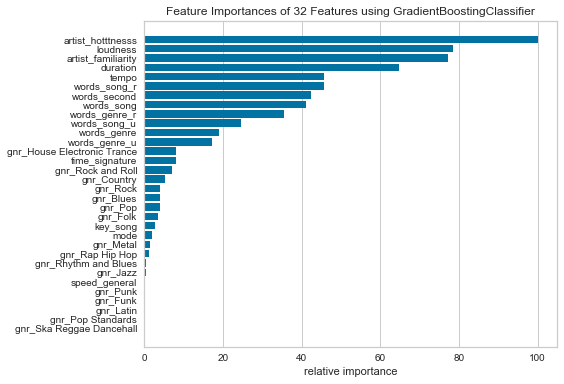

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features import FeatureImportances

model = GradientBoostingClassifier()
model.fit(features, labels.values.ravel())
model.feature_importances_

oz = FeatureImportances(GradientBoostingClassifier())
oz.fit(features, labels.values.ravel())
oz.poof()


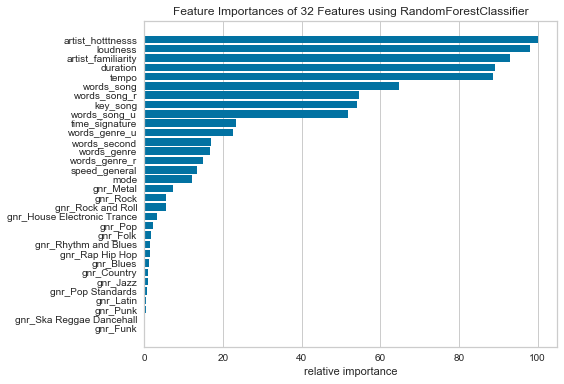

In [69]:
model = RandomForestClassifier(n_estimators=10)
model.fit(features, labels.values.ravel())
model.feature_importances_

oz = FeatureImportances(RandomForestClassifier())
oz.fit(features, labels.values.ravel())
oz.poof()

### PCA Principal Component Analysis

In [102]:
# Specify the features of interest and the target
target = "is_top40"
features = [col for col in df.columns if col != target]
# features = ['duration', 'loudness', 'mode', 'tempo', 'words_song', 'words_song_r', 'words_genre_u', 'words_genre_r',\
#             'words_second', 'artist_hotttnesss', 'gnr_Metal', 'gnr_Rock', 'gnr_Rock and Roll']

# Extract the instance data and the target
X = df[features]
y = df[target]

# Create a list of colors to assign to points in the plot
colors = np.array(['g' if yi else 'b' for yi in y])

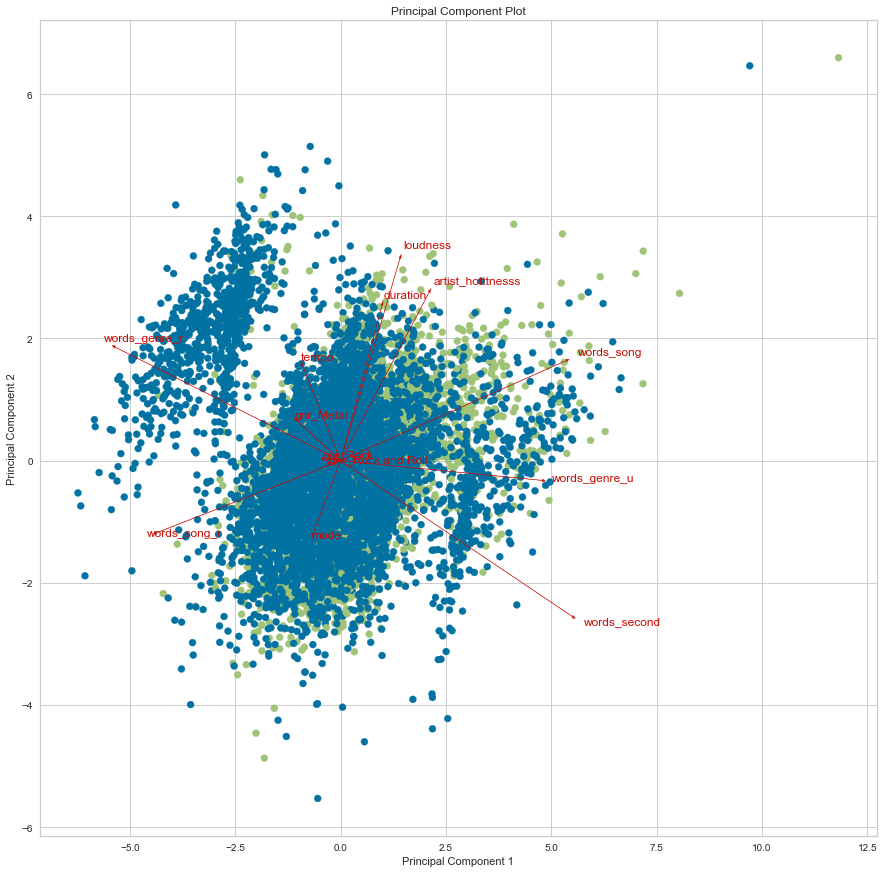

In [96]:
from yellowbrick.features.pca import PCADecomposition
_, axi = plt.subplots(figsize=(15,15))
visualizer = PCADecomposition(scale=False, color=colors,proj_features=True, ax=axi, alpha=0.50)
visualizer.fit_transform(X, y)
visualizer.poof()

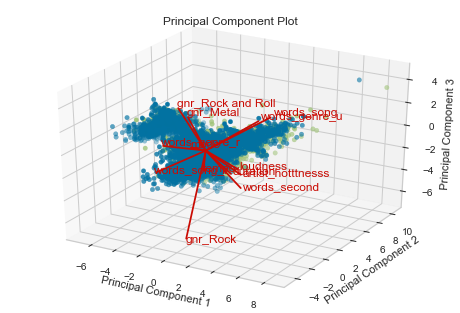

In [94]:
visualizer = PCADecomposition(scale=True, color=colors, proj_dim=3,proj_features=True)
visualizer.fit_transform(X, y)
visualizer.poof()

### Recursive Feature Elimination

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC

from sklearn.ensemble import AdaBoostClassifier

models = []
#Classification Models
#Naive Bayes
models.append(('NB', GaussianNB()))
models.append(('MNB', MultinomialNB()))
models.append(('BNB', BernoulliNB()))
#Decision Tree
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=10,max_depth=10)))
#Discriminant Analysis
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))

#LogisticRegression
models.append(('LRG', LogisticRegression()))
models.append(('LCV', LogisticRegressionCV()))

#KNN
models.append(('KNN', KNeighborsClassifier()))
models.append(('KNN', NearestCentroid()))
models.append(('KNN', NearestNeighbors()))
models.append(('KNN', RadiusNeighborsClassifier()))
#Support Vector Machine
models.append(('SVM', SVC())) 
models.append(('NuSVM', NuSVC())) 
#kernel="linear", C=0.025)))
models.append(('LinearSVC', LinearSVC())) #kernel="linear", C=0.025)))
              
models.append(('ABC',AdaBoostClassifier()))

KeyboardInterrupt: 

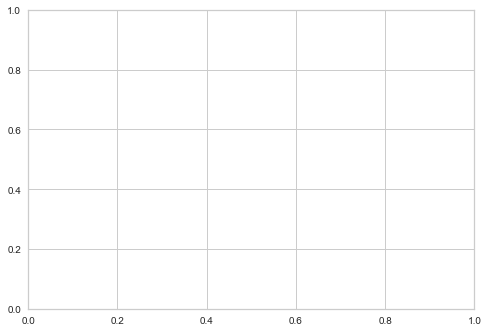

In [104]:
from yellowbrick.features import RFECV
from sklearn.model_selection import StratifiedKFold
# Create a dataset with only 3 informative features
X = df[features]
y = df[target]
start_time = time.time()
# # Create RFECV visualizer with linear SVM classifier
# viz = RFECV(SVC(kernel='linear', C=1))
cv = StratifiedKFold(5)
oz = RFECV(RandomForestClassifier(), scoring='f1',cv = StratifiedKFold(5))
viz.fit(X, y)
viz.poof()
print('--- %s seconds ---' % (time.time() - start_time))

#### Its important to note that  actually the lyrics related features matter most than some musical features and all of the genres. 

### Saving Structure to Database

In [97]:
def sqlalchemy_engine():
    try:
        credentials = unencrypt()
        user_id = credentials.user
        user_password = credentials.password
        dbname = credentials.dbname
        server = credentials.server
        connstring = "mysql+mysqldb://{user}:{password}@{server}/{dbname}".format(server=server,user=user_id,password=user_password,dbname=dbname)
        engine = create_engine(connstring)
        return engine
    except Exception as e:
        print("Exception occurred \n" +str(e))
songs = df[['duration', 'key_song', 'loudness', 'mode', 'tempo', 'time_signature', \
               'words_song_u','words_song', 'words_song_r', 'words_genre_u','words_genre','words_genre_r','words_second',
             'speed_general', 'artist_familiarity', 'artist_hotttnesss', 'gnr_Blues', 'gnr_Country', 'gnr_Folk', \
            'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Latin', 'gnr_Metal', 'gnr_Pop', 'gnr_Pop Standards', 'gnr_Punk',\
            'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall','is_top40']]
songs.to_sql(con = sqlalchemy_engine(), name='songs_instance_normalized', if_exists='append')